## Bank Telemarketing Campaign Case Study.

In this case study you’ll be learning Exploratory Data Analytics with the help of a case study on "Bank marketing campaign". This will enable you to understand why EDA is a most important step in the process of Machine Learning.

#### Problem Statement:

 

The bank provides financial services/products such as savings accounts, current accounts, debit cards, etc. to its customers. In order to increase its overall revenue, the bank conducts various marketing campaigns for its financial products such as credit cards, term deposits, loans, etc. These campaigns are intended for the bank’s existing customers. However, the marketing campaigns need to be cost-efficient so that the bank not only increases their overall revenues but also the total profit. You need to apply your knowledge of EDA on the given dataset to analyse the patterns and provide inferences/solutions for the future marketing campaign.

The bank conducted a telemarketing campaign for one of its financial products ‘Term Deposits’ to help foster long-term relationships with existing customers. The dataset contains information about all the customers who were contacted during a particular year to open term deposit accounts.


**What is the term Deposit?**

Term deposits also called fixed deposits, are the cash investments made for a specific time period ranging from 1 month to 5 years for predetermined fixed interest rates. The fixed interest rates offered for term deposits are higher than the regular interest rates for savings accounts. The customers receive the total amount (investment plus the interest) at the end of the maturity period. Also, the money can only be withdrawn at the end of the maturity period. Withdrawing money before that will result in an added penalty associated, and the customer will not receive any interest returns.

The target is to do end to end EDA on this bank telemarketing campaign data set to infer knowledge that where bank has to put more effort to improve it's positive response rate. 

#### Importing the libraries.

In [1]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")


In [2]:
#import the useful libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Session- 2, Data Cleaning 

### Segment- 2, Data Types 

There are multiple types of data types available in the data set. some of them are numerical type and some of categorical type. You are required to get the idea about the data types after reading the data frame. 

Following are the some of the types of variables:
- **Numeric data type**: banking dataset: salary, balance, duration and age.
- **Categorical data type**: banking dataset: education, job, marital, poutcome and month etc.
- **Ordinal data type**: banking dataset: Age group.
- **Time and date type** 
- **Coordinates type of data**: latitude and longitude type.


#### Read in the Data set. 

In [3]:
#read the data set of "bank telemarketing campaign" in inp0.
inp0= pd.read_csv("bank_marketing_updated_v1.csv")

In [4]:
#Print the head of the data frame.
inp0.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


### Segment- 3, Fixing the Rows and Columns 

Checklist for fixing rows:
- **Delete summary rows**: Total and Subtotal rows
- **Delete incorrect rows**: Header row and footer row
- **Delete extra rows**: Column number, indicators, Blank rows, Page No.

Checklist for fixing columns:
- **Merge columns for creating unique identifiers**, if needed, for example, merge the columns State and City into the column Full address.
- **Split columns to get more data**: Split the Address column to get State and City columns to analyse each separately. 
- **Add column names**: Add column names if missing.
- **Rename columns consistently**: Abbreviations, encoded columns.
- **Delete columns**: Delete unnecessary columns.
- **Align misaligned columns**: The data set may have shifted columns, which you need to align correctly.


#### Read the file without unnecessary headers.

In [5]:
#@ 
new_header = inp0.iloc[1] # grab the row for the header
new_header

banking marketing    customerid
Unnamed: 1                  age
Unnamed: 2               salary
Unnamed: 3              balance
Unnamed: 4              marital
Unnamed: 5               jobedu
Unnamed: 6             targeted
Unnamed: 7              default
Unnamed: 8              housing
Unnamed: 9                 loan
Unnamed: 10             contact
Unnamed: 11                 day
Unnamed: 12               month
Unnamed: 13            duration
Unnamed: 14            campaign
Unnamed: 15               pdays
Unnamed: 16            previous
Unnamed: 17            poutcome
Unnamed: 18            response
Name: 1, dtype: object

In [6]:
#read the file in inp0 without first two rows as they are of no use.
inp0 = inp0.loc[2:]
inp0.columns 

Index(['banking marketing', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18'],
      dtype='object')

In [7]:
inp0.columns = new_header
inp0.shape

(45211, 19)

In [8]:
#print the head of the data frame.
inp0.head()

1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
5,4,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
6,5,33,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [9]:
inp0.reset_index(drop=True,inplace=True)
inp0.rename_axis('',axis=1,inplace = True)

In [10]:
inp0

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45207,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45208,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45209,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


In [11]:
#print the information of variables to check their data types.
inp0.dtypes


customerid    object
age           object
salary        object
balance       object
marital       object
jobedu        object
targeted      object
default       object
housing       object
loan          object
contact       object
day           object
month         object
duration      object
campaign      object
pdays         object
previous      object
poutcome      object
response      object
dtype: object

In [12]:
#convert the age variable data type from float to integer.
inp0["age"]= inp0["age"].astype(float)
inp0

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45207,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45208,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45209,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


In [13]:
#print the average age of customers.
round(inp0.age.mean())

41

In [14]:
inp0.age.dtype
inp0.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


#### Dropping customer id column. 

In [15]:
#drop the customer id as it is of no use.
inp0.drop(['customerid'],axis=1,inplace=True)

In [16]:
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


#### Dividing "jobedu" column into job and education categories. 

In [17]:
#Extract job in newly created 'job' column from "jobedu" column.
inp0['job']= inp0.jobedu.map(lambda x: x.split(",")[0] )
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown


In [18]:
#Extract education in newly created 'education' column from "jobedu" column.
inp0['education']= inp0.jobedu.map(lambda x: x.split(",")[1] )
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [19]:
#drop the "jobedu" column from the dataframe.
inp0.drop(columns=['jobedu'],inplace = True)

In [20]:
inp0.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


### Segment- 4, Impute/Remove missing values 

Take aways from the lecture on missing values:

- **Set values as missing values**: Identify values that indicate missing data, for example, treat blank strings, "NA", "XX", "999", etc., as missing.
- **Adding is good, exaggerating is bad**: You should try to get information from reliable external sources as much as possible, but if you can’t, then it is better to retain missing values rather than exaggerating the existing rows/columns.
- **Delete rows and columns**: Rows can be deleted if the number of missing values is insignificant, as this would not impact the overall analysis results. Columns can be removed if the missing values are quite significant in number.
- **Fill partial missing values using business judgement**: Such values include missing time zone, century, etc. These values can be identified easily.

Types of missing values:
- **MCAR**: It stands for Missing completely at random (the reason behind the missing value is not dependent on any other feature).
- **MAR**: It stands for Missing at random (the reason behind the missing value may be associated with some other features).
- **MNAR**: It stands for Missing not at random (there is a specific reason behind the missing value).


#### handling missing values in age column.

In [21]:
inp0.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [22]:
#count the missing values in age column.
inp0.age.isnull().sum()

20

In [23]:
#pring the shape of dataframe inp0
inp0.shape

(45211, 19)

In [24]:
#calculate the percentage of missing values in age column.
inp0.age.isnull().sum()/45211

0.00044237021963681403

Drop the records with age missing. 

In [25]:
inp0[inp0.age.isna()]

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
161,NaN,60000,47,single,no,no,yes,no,unknown,5,"may, 2017",181 sec,1,-1,0,unknown,no,technician,tertiary
1021,NaN,60000,-500,married,yes,no,yes,no,unknown,7,"may, 2017",78 sec,5,-1,0,unknown,no,technician,secondary
1585,NaN,100000,123,divorced,yes,no,no,no,unknown,8,"may, 2017",306 sec,2,-1,0,unknown,no,management,secondary
3943,NaN,70000,62,married,yes,no,yes,yes,unknown,16,"may, 2017",280 sec,2,-1,0,unknown,no,services,tertiary
5675,NaN,20000,-85,married,yes,no,yes,yes,unknown,26,"may, 2017",118 sec,1,-1,0,unknown,no,blue-collar,primary
6873,NaN,70000,1336,divorced,yes,no,yes,no,unknown,28,"may, 2017",298 sec,5,-1,0,unknown,no,services,secondary
9692,NaN,50000,-162,single,no,no,yes,yes,unknown,6,"jun, 2017",119 sec,1,-1,0,unknown,no,admin.,tertiary
11653,NaN,8000,2562,single,yes,no,no,no,unknown,20,"jun, 2017",489 sec,2,-1,0,unknown,no,unemployed,primary
13417,NaN,20000,452,divorced,yes,no,yes,no,cellular,9,"jul, 2017",96 sec,1,-1,0,unknown,no,blue-collar,primary
14541,NaN,20000,-84,married,yes,no,no,yes,cellular,15,"jul, 2017",1.25 min,4,-1,0,unknown,no,blue-collar,secondary


In [26]:
#drop the records with age missing in inp0 and copy in inp1 dataframe.
inp1= inp0.dropna(subset=['age'])

In [27]:
inp1.shape


(45191, 19)

In [28]:
inp0[~inp0.age.isna()] #can be also done using negation.

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45207,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45208,72.0,55000,5715,married,yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary
45209,57.0,20000,668,married,yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary


In [29]:
index_of_missing = inp0[inp0.age.isna()].index # another method to drop missing values
index_of_missing

Int64Index([  161,  1021,  1585,  3943,  5675,  6873,  9692, 11653, 13417,
            14541, 17159, 19457, 23483, 23939, 26531, 35920, 40757, 40994,
            43573, 44974],
           dtype='int64')

In [30]:
t2 = inp0.drop(index=index_of_missing)
t2.shape

(45191, 19)

#### handling missing values in month column

In [31]:
#count the missing values in month column in inp1.
inp1.month.isnull().sum()

50

In [32]:
inp1.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [33]:
#print the percentage of each month in the data frame inp1.
inp1.month.value_counts()/len(inp1.month)*100

may, 2017    30.404284
jul, 2017    15.235334
aug, 2017    13.796995
jun, 2017    11.801022
nov, 2017     8.778297
apr, 2017     6.483592
feb, 2017     5.855148
jan, 2017     3.102388
oct, 2017     1.630856
sep, 2017     1.274590
mar, 2017     1.053307
dec, 2017     0.473546
Name: month, dtype: float64

In [34]:
inp1.month.value_counts(normalize=True)*100

may, 2017    30.437961
jul, 2017    15.252210
aug, 2017    13.812277
jun, 2017    11.814094
nov, 2017     8.788020
apr, 2017     6.490773
feb, 2017     5.861634
jan, 2017     3.105824
oct, 2017     1.632662
sep, 2017     1.276002
mar, 2017     1.054474
dec, 2017     0.474070
Name: month, dtype: float64

In [35]:
#find the mode of month in inp1
mode_month = inp1.month.mode()
type(mode_month.loc[0])

str

In [36]:
# fill the missing values with mode value of month in inp1.
inp1.month.fillna(mode_month.loc[0],inplace=True)

In [37]:
#let's see the null values in the month column.
inp1.month.isna().sum()

0

#### handling missing values in response column 

In [38]:
#count the missing values in response column in inp1.
inp1.response.isna().sum()

30

In [39]:
#calculate the percentage of missing values in response column. 
(inp1.response.isna().sum()/len(inp1.response))*100

0.06638489964816004

Target variable is better of not imputed.
- Drop the records with missing values.

In [40]:
#drop the records with response missings in inp1.
respose_missing_inp1 = inp1[inp1.response.isna()].index
print(respose_missing_inp1)
inp1.drop(respose_missing_inp1,inplace = True)

Int64Index([ 1016,  2027,  2568,  2695,  5258,  8529,  8571,  9268, 11534,
            12185, 17262, 21243, 21271, 22002, 23247, 24253, 24276, 24300,
            25851, 26557, 29127, 32606, 33763, 37065, 38044, 39099, 39504,
            39976, 40397, 40774],
           dtype='int64')


In [41]:
#calculate the missing values in each column of data frame: inp1.
inp1.isna().sum()


age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

In [42]:
inp1.response.dropna()

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: response, Length: 45161, dtype: object

#### handling pdays column. 

In [43]:
inp1.shape
inp1.pdays = inp1.pdays.astype(float)

In [44]:
#describe the pdays column of inp1.
inp1.pdays.describe()


count    45161.000000
mean        40.182015
std        100.079372
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [45]:
inp1.pdays.replace(-1,np.NaN,inplace = True)

-1 indicates the missing values.
Missing value does not always be present as null.
How to handle it:

Objective is:
- ignore the missing values in the calculations
- simply make it missing - replace -1 with NaN.
- all summary statistics- mean, median etc. we will ignore the missing values of pdays.

In [46]:
#describe the pdays column with considering the -1 values.
inp1.pdays.describe()

count    8246.000000
mean      224.542202
std       115.210792
min         1.000000
25%       133.000000
50%       195.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [47]:
inp1.loc[:,['pdays']]

,pdays
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
45206,NaN
45207,NaN
45208,184.0
45209,NaN


### Segment- 5, Handling Outliers 

Major approaches to the treat outliers:
 		
- **Imputation**
- **Deletion of outliers**
- **Binning of values**
- **Cap the outlier**


#### Age variable 

In [48]:
#describe the age variable in inp1.
inp1.age.describe()

count    45161.000000
mean        40.935763
std         10.618790
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

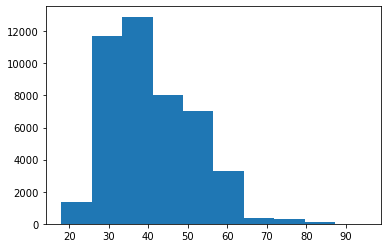

In [49]:
#plot the histogram of age variable.
plt.hist(inp1.age)
plt.show()

<AxesSubplot:ylabel='Frequency'>

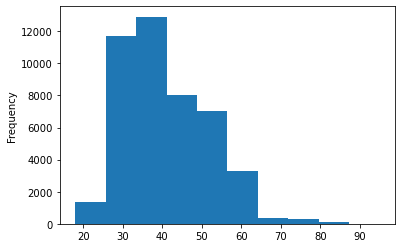

In [50]:
inp1.age.plot.hist()

<AxesSubplot:>

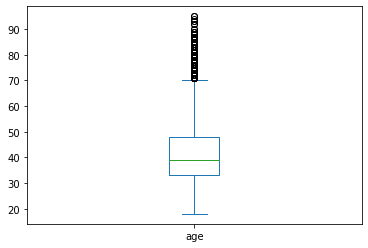

In [51]:
#plot the boxplot of age variable.
inp1.age.plot.box()

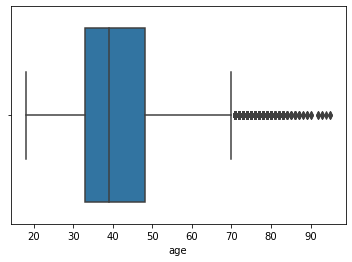

In [52]:
sns.boxplot(inp1.age,orient=90)
plt.show()

#### Salary variable 

In [53]:
#describe the salary variable of inp1.
inp1.salary = inp1.salary.astype(float)

In [54]:
inp1.salary.describe()

count     45161.000000
mean      57004.849317
std       32087.698810
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

<AxesSubplot:xlabel='salary'>

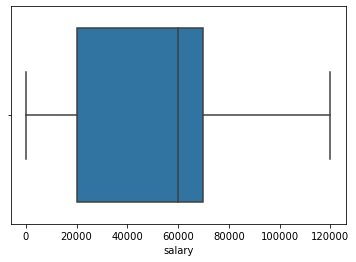

In [55]:
#plot the boxplot of salary variable.
sns.boxplot(inp1.salary)

#### Balance variable 

In [56]:
#describe the balance variable of inp1.
inp1.balance = inp1.balance.astype(float)
inp1.balance.describe()

count     45161.000000
mean       1362.850690
std        3045.939589
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

<AxesSubplot:xlabel='balance'>

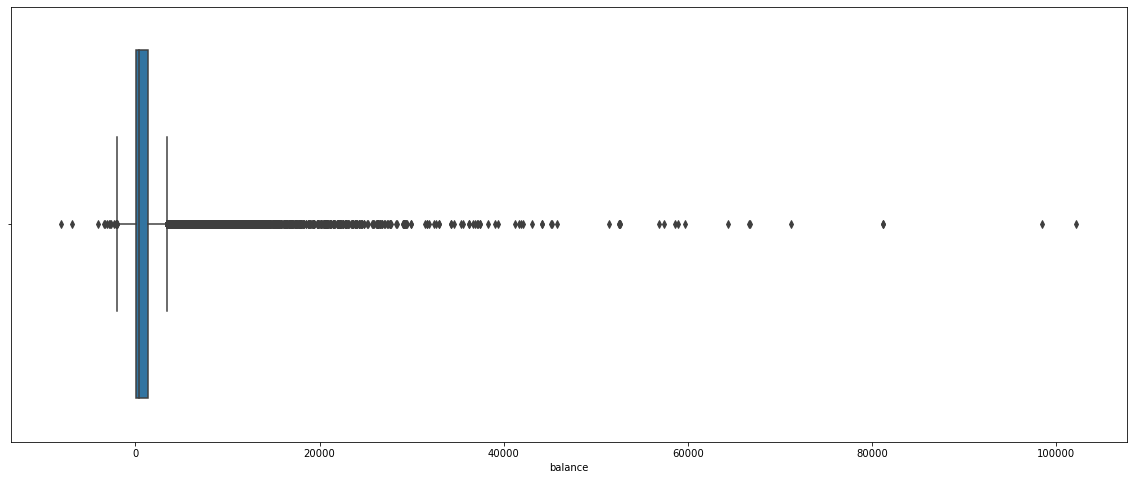

In [57]:
#plot the boxplot of balance variable.
plt.figure(figsize=(20,8))
sns.boxplot(inp1.balance)

<AxesSubplot:xlabel='balance'>

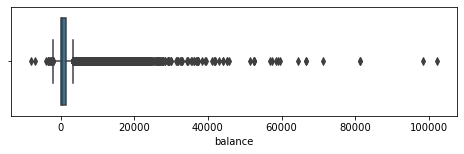

In [58]:
#plot the boxplot of balance variable after scaling in 8:2.
plt.figure(figsize=(8,2))
sns.boxplot(inp1.balance)

In [59]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of balance variable
inp1.balance.quantile(q=[0.5, 0.7, 0.9, 0.95,0.99])

0.50      448.0
0.70     1126.0
0.90     3576.0
0.95     5769.0
0.99    13173.4
Name: balance, dtype: float64

### Segment- 6, Standardising values 

Checklist for data standardization exercises:
- **Standardise units**: Ensure all observations under one variable are expressed in a common and consistent unit, e.g., convert lbs to kg, miles/hr to km/hr, etc.
- **Scale values if required**: Make sure all the observations under one variable have a common scale.
- **Standardise precision** for better presentation of data, e.g., change 4.5312341 kg to 4.53 kg.
- **Remove extra characters** such as common prefixes/suffixes, leading/trailing/multiple spaces, etc. These are irrelevant to analysis.
- **Standardise case**: String variables may take various casing styles, e.g., UPPERCASE, lowercase, Title Case, Sentence case, etc.
- **Standardise format**: It is important to standardise the format of other elements such as date, name, etce.g., change 23/10/16 to 2016/10/23, “Modi, Narendra” to “Narendra Modi", etc.

#### Duration variable

In [60]:
#describe the duration variable of inp1
inp1.duration

0                     261 sec
1                     151 sec
2                      76 sec
3                      92 sec
4                     198 sec
                 ...         
45206    16.2833333333333 min
45207                 7.6 min
45208    18.7833333333333 min
45209    8.46666666666667 min
45210    6.01666666666667 min
Name: duration, Length: 45161, dtype: object

In [61]:
#convert the duration variable into single unit i.e. minutes. and remove the sec or min prefix.
def min_converter(x):
    l1 = x.split(" ")
    if(l1[1]== 'min'):
        return str(round(float(l1[0]),2)) + ' min' 
    
    else:
        a = round(float(l1[0])/60,2)
        
        return str(a) +' min'


inp1.duration.map(min_converter)

0         4.35 min
1         2.52 min
2         1.27 min
3         1.53 min
4          3.3 min
           ...    
45206    16.28 min
45207      7.6 min
45208    18.78 min
45209     8.47 min
45210     6.02 min
Name: duration, Length: 45161, dtype: object

In [62]:
#describe the duration variable
inp1.duration

0                     261 sec
1                     151 sec
2                      76 sec
3                      92 sec
4                     198 sec
                 ...         
45206    16.2833333333333 min
45207                 7.6 min
45208    18.7833333333333 min
45209    8.46666666666667 min
45210    6.01666666666667 min
Name: duration, Length: 45161, dtype: object

## Session- 3, Univariate Analysis 

### Segment- 2, Categorical unordered univariate analysis 

Unordered data do not have the notion of high-low, more-less etc. Example:
- Type of loan taken by a person = home, personal, auto etc.
- Organisation of a person = Sales, marketing, HR etc.
- Job category of persone.
- Marital status of any one.


#### Marital status 

In [63]:
inp1.info()
inp1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45161 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45161 non-null  float64
 1   salary     45161 non-null  float64
 2   balance    45161 non-null  float64
 3   marital    45161 non-null  object 
 4   targeted   45161 non-null  object 
 5   default    45161 non-null  object 
 6   housing    45161 non-null  object 
 7   loan       45161 non-null  object 
 8   contact    45161 non-null  object 
 9   day        45161 non-null  object 
 10  month      45161 non-null  object 
 11  duration   45161 non-null  object 
 12  campaign   45161 non-null  object 
 13  pdays      8246 non-null   float64
 14  previous   45161 non-null  object 
 15  poutcome   45161 non-null  object 
 16  response   45161 non-null  object 
 17  job        45161 non-null  object 
 18  education  45161 non-null  object 
dtypes: float64(4), object(15)
memory usage: 6.9+ M

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000.0,2143.0,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,NaN,0,unknown,no,management,tertiary
1,44.0,60000.0,29.0,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,NaN,0,unknown,no,technician,secondary
2,33.0,120000.0,2.0,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,NaN,0,unknown,no,entrepreneur,secondary
3,47.0,20000.0,1506.0,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,NaN,0,unknown,no,blue-collar,unknown
4,33.0,0.0,1.0,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,NaN,0,unknown,no,unknown,unknown


In [64]:
#calculate the percentage of each marital status category. 
inp1.marital.value_counts()/len(inp1.marital)* 100

married     60.195744
single      28.294325
divorced    11.509931
Name: marital, dtype: float64

In [65]:
inp1.marital.value_counts(normalize=True)* 100

married     60.195744
single      28.294325
divorced    11.509931
Name: marital, dtype: float64

<AxesSubplot:ylabel='marital'>

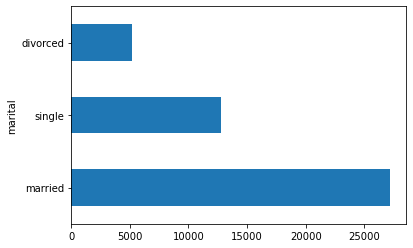

In [66]:
inp1.groupby('marital').marital.count().sort_values(ascending=False).plot.barh()

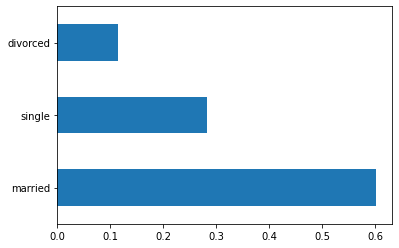

In [67]:
#plot the bar graph of percentage marital status categories
inp1.marital.value_counts(normalize=True).plot.barh()
plt.show()

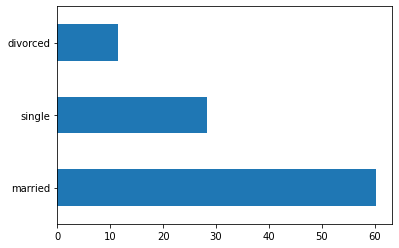

In [68]:
(inp1.marital.value_counts(normalize=True)*100).plot.barh()
plt.show()

<BarContainer object of 3 artists>

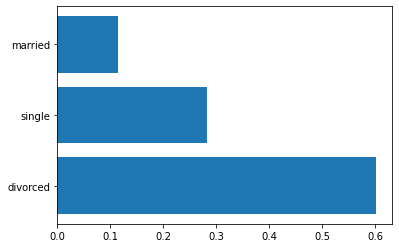

In [69]:
plt.barh(y=['divorced','single','married'],width = inp1.marital.value_counts(normalize=True))

In [70]:
(inp1.marital.value_counts(normalize=True)*100).index

Index(['married', 'single', 'divorced'], dtype='object')

#### Job  

In [71]:
#calculate the percentage of each job status category.
(inp1.job.value_counts(normalize=True)*100)

blue-collar      21.527424
management       20.927349
technician       16.804322
admin.           11.436859
services          9.184916
retired           5.008746
self-employed     3.485308
entrepreneur      3.286021
unemployed        2.883019
housemaid         2.741303
student           2.077013
unknown           0.637718
Name: job, dtype: float64

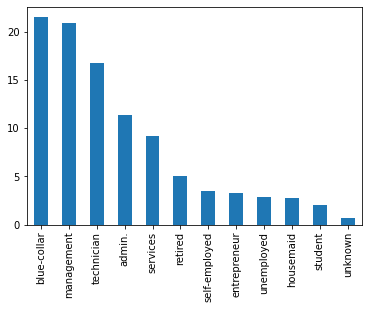

In [72]:
(inp1.job.value_counts(normalize=True)*100).plot.bar()
plt.show()

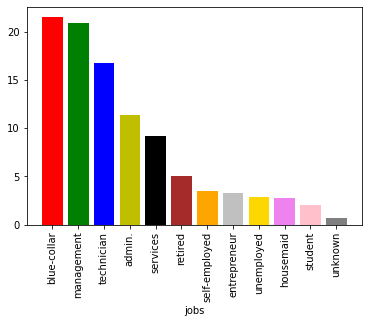

In [73]:
plt.bar(x=( inp1.job.value_counts(normalize=True)*100).index,height=inp1.job.value_counts(normalize=True)*100,color=['r','g','b','y','k','brown','orange','silver','gold','violet','pink','grey'])
plt.xlabel('jobs')
plt.xticks(rotation = 90)
plt.show()

### Segment- 3, Categorical ordered univariate analysis 

Ordered variables have some kind of ordering. Some examples of bank marketing dataset are:
- Age group= <30, 30-40, 40-50 and so on.
- Month = Jan-Feb-Mar etc.
- Education = primary, secondary and so on.

In [74]:
inp1.head(2)

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000.0,2143.0,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,NaN,0,unknown,no,management,tertiary
1,44.0,60000.0,29.0,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,NaN,0,unknown,no,technician,secondary


In [75]:
inp1.groupby('education').salary.agg(['mean','median']).sort_values(by='mean')

,mean,median
education,,
primary,34232.343910,20000.0
unknown,46529.633621,50000.0
secondary,49731.449525,55000.0
tertiary,82880.249887,100000.0


In [76]:
l1=[50000,20000,120000,16000,100000,55000,60000,70000,4000,60000,8000,0]
l1.sort()
l1
(50000+55000)/2
np.array(l1).mean()

46916.666666666664

#### Education

In [77]:
#calculate the percentage of each education category.
inp1.education.value_counts(normalize = True)*100

secondary    51.327473
tertiary     29.419189
primary      15.143597
unknown       4.109741
Name: education, dtype: float64

<AxesSubplot:ylabel='education'>

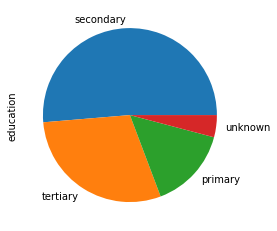

In [78]:
#plot the pie chart of education categories
(inp1.education.value_counts(normalize = True)*100).plot.pie()

#### poutcome 
This column represents the outcome of the previous reach outs for any of the products(other than term deposits) provided by banks                                                                                                    Unknown - This represents that the customer has not been reached so far       Success - This represents that the previous call was a successful conversion of the customer                                                                                                                Failure - This represents that the customer is not interested in the last product                                                                                                                                                      Other -  This represents that during the previous call, the customer has not given any definite answer

In [79]:
inp1.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000.0,2143.0,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,NaN,0,unknown,no,management,tertiary
1,44.0,60000.0,29.0,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,NaN,0,unknown,no,technician,secondary
2,33.0,120000.0,2.0,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,NaN,0,unknown,no,entrepreneur,secondary
3,47.0,20000.0,1506.0,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,NaN,0,unknown,no,blue-collar,unknown
4,33.0,0.0,1.0,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,NaN,0,unknown,no,unknown,unknown


In [80]:
#calculate the percentage of each poutcome category.
inp1.poutcome.value_counts(normalize=True)*100

unknown    81.751954
failure    10.836784
other       4.072098
success     3.339164
Name: poutcome, dtype: float64

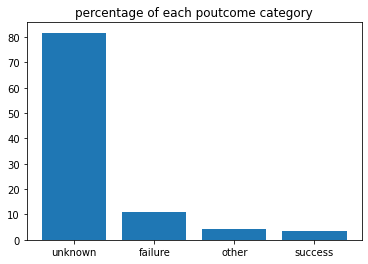

In [81]:

plt.bar(data = inp1, x = inp1.poutcome.value_counts().index ,height = inp1.poutcome.value_counts(normalize=True)*100)
plt.title('percentage of each poutcome category')
plt.show()

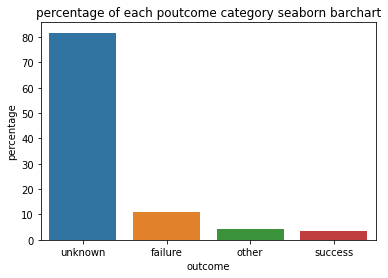

In [82]:
#using seaborn
sns.barplot(data = inp1, x = inp1.poutcome.value_counts().index ,y = inp1.poutcome.value_counts(normalize=True)*100)
plt.xlabel('outcome')
plt.ylabel('percentage')
plt.title('percentage of each poutcome category seaborn barchart')
plt.show()

#### Response the target variable 

In [83]:
#calculate the percentage of each response category.
inp1.response.value_counts(normalize = True)

no     0.882974
yes    0.117026
Name: response, dtype: float64

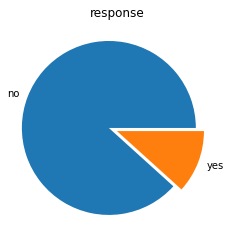

In [84]:
#plot the pie chart of response categories
plt.pie(inp1.response.value_counts(),labels=inp1.response.value_counts().index,explode=[.1,0]) # explode to make it look cool
plt.title('response')
plt.show()

## Session- 4, Bivariate and Multivariate Analysis

### Segment-2, Numeric- numeric analysis 

There are three ways to analyse the numeric- numeric data types simultaneously.
- **Scatter plot**: describes the pattern that how one variable is varying with other variable.
- **Correlation matrix**: to describe the linearity of two numeric variables.
- **Pair plot**: group of scatter plots of all numeric variables in the data frame.

In [85]:
inp1.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000.0,2143.0,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,NaN,0,unknown,no,management,tertiary
1,44.0,60000.0,29.0,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,NaN,0,unknown,no,technician,secondary
2,33.0,120000.0,2.0,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,NaN,0,unknown,no,entrepreneur,secondary
3,47.0,20000.0,1506.0,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,NaN,0,unknown,no,blue-collar,unknown
4,33.0,0.0,1.0,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,NaN,0,unknown,no,unknown,unknown


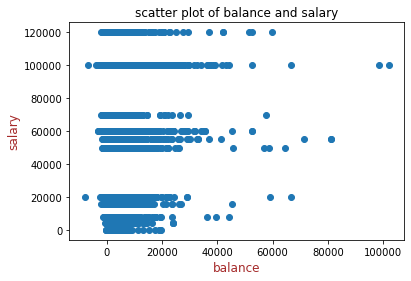

In [86]:
#plot the scatter plot of balance and salary variable in inp1
plt.scatter(data = inp1,x ='balance',y='salary')
plt.title('scatter plot of balance and salary')
plt.xlabel("balance", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("salary", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

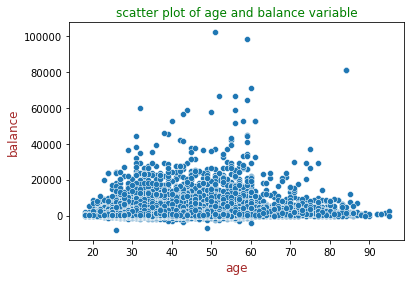

In [87]:
#plot the scatter plot of balance and age variable in inp1
sns.scatterplot(data = inp1 ,x='age',y = 'balance')
plt.title('scatter plot of age and balance variable',fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'green'})
plt.xlabel("age", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("balance", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

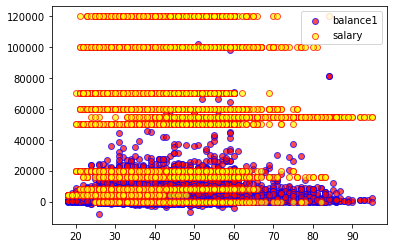

In [88]:
#plot the pair plot of salary, balance and age in inp1 dataframe.
plt.scatter(data =inp1, x='age' ,y='balance',c='red',alpha=.7,edgecolors='b',label='balance1')
plt.scatter(data =inp1, x='age' ,y='salary',c='yellow',alpha=.7,edgecolors='r',label='salary')
plt.legend()
plt.show()

#### select salary, balance and age in inp1 dataframe using loc and iloc method


In [89]:
inp1.head(2)

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000.0,2143.0,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,NaN,0,unknown,no,management,tertiary
1,44.0,60000.0,29.0,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,NaN,0,unknown,no,technician,secondary


In [90]:
inp1.loc[:,['salary','balance','age']]

,salary,balance,age
0,100000.0,2143.0,58.0
1,60000.0,29.0,44.0
2,120000.0,2.0,33.0
3,20000.0,1506.0,47.0
4,0.0,1.0,33.0
...,...,...,...
45206,60000.0,825.0,51.0
45207,55000.0,1729.0,71.0
45208,55000.0,5715.0,72.0
45209,20000.0,668.0,57.0


In [91]:
inp1.iloc[:,[1,2,0]]

,salary,balance,age
0,100000.0,2143.0,58.0
1,60000.0,29.0,44.0
2,120000.0,2.0,33.0
3,20000.0,1506.0,47.0
4,0.0,1.0,33.0
...,...,...,...
45206,60000.0,825.0,51.0
45207,55000.0,1729.0,71.0
45208,55000.0,5715.0,72.0
45209,20000.0,668.0,57.0


In [92]:
inp1.head(2)

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000.0,2143.0,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,NaN,0,unknown,no,management,tertiary
1,44.0,60000.0,29.0,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,NaN,0,unknown,no,technician,secondary


In [93]:
inp1.loc[:,'age':'marital'] # age through marital gives 4 columns as loc is inclusive of last column.

,age,salary,balance,marital
0,58.0,100000.0,2143.0,married
1,44.0,60000.0,29.0,single
2,33.0,120000.0,2.0,married
3,47.0,20000.0,1506.0,married
4,33.0,0.0,1.0,single
...,...,...,...,...
45206,51.0,60000.0,825.0,married
45207,71.0,55000.0,1729.0,divorced
45208,72.0,55000.0,5715.0,married
45209,57.0,20000.0,668.0,married


In [94]:
inp1.iloc[:,0:4] # 0 through 3 only gives 3 columns as iloc is exclusive of last column.

,age,salary,balance,marital
0,58.0,100000.0,2143.0,married
1,44.0,60000.0,29.0,single
2,33.0,120000.0,2.0,married
3,47.0,20000.0,1506.0,married
4,33.0,0.0,1.0,single
...,...,...,...,...
45206,51.0,60000.0,825.0,married
45207,71.0,55000.0,1729.0,divorced
45208,72.0,55000.0,5715.0,married
45209,57.0,20000.0,668.0,married


#### Correlation heat map 

In [95]:
#plot the correlation matrix of salary, balance and age in inp1 dataframe.

In [96]:
inp1.head(2)

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000.0,2143.0,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,NaN,0,unknown,no,management,tertiary
1,44.0,60000.0,29.0,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,NaN,0,unknown,no,technician,secondary


In [97]:
inp1.loc[:,['salary','balance','age']].corr()

,salary,balance,age
,,,
salary,1.000000,0.055489,0.024513
balance,0.055489,1.000000,0.097710
age,0.024513,0.097710,1.000000


In [98]:
inp1.columns

Index(['age', 'salary', 'balance', 'marital', 'targeted', 'default', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'response', 'job', 'education'],
      dtype='object', name='')

### Segment- 4, Numerical categorical variable

#### Salary vs response 

In [99]:
inp1.head(3)

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000.0,2143.0,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,NaN,0,unknown,no,management,tertiary
1,44.0,60000.0,29.0,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,NaN,0,unknown,no,technician,secondary
2,33.0,120000.0,2.0,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,NaN,0,unknown,no,entrepreneur,secondary


In [100]:
inp1.response.value_counts()

no     39876
yes     5285
Name: response, dtype: int64

In [101]:
#groupby the response to find the mean of the salary with response no & yes seperatly.
inp1.groupby('response')['salary'].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [102]:
#groupby the response to find the median of the salary with response no & yes seperatly.
inp1.groupby('response')['salary'].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

In [103]:
inp1.columns

Index(['age', 'salary', 'balance', 'marital', 'targeted', 'default', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'response', 'job', 'education'],
      dtype='object', name='')

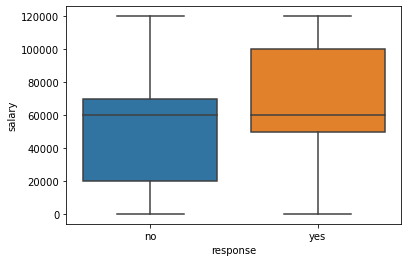

In [104]:
#plot the box plot of salary for yes & no responses.
sns.boxplot(data=inp1,x='response',y='salary')
plt.show()

#### Balance vs response 

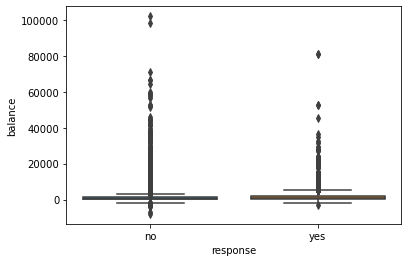

In [105]:
#plot the box plot of balance for yes & no responses.
sns.boxplot(data=inp1,x='response',y='balance')
plt.show()

In [106]:
#groupby the response to find the mean of the balance with response no & yes seperatly.
inp1.groupby('response').balance.mean()

response
no     1304.292281
yes    1804.681362
Name: balance, dtype: float64

In [107]:
#groupby the response to find the median of the balance with response no & yes seperatly.
inp1.groupby('response').balance.median()

response
no     417.0
yes    733.0
Name: balance, dtype: float64

##### 75th percentile 

In [108]:
#function to find the 75th percentile.
def p75(x):
    return np.quantile(x, 0.75)

#calculate the mean, median and 75th percentile of balance with response
inp1.groupby("response")['balance'].aggregate(["mean","median",p75])

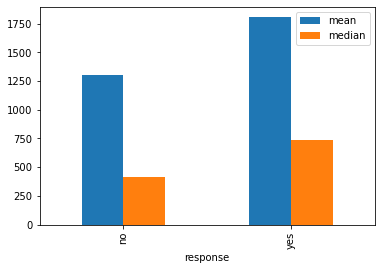

In [109]:
#plot the bar graph of balance's mean an median with response.
inp1.groupby("response")['balance'].aggregate(["mean","median"]).plot.bar()
plt.show()

#### Education vs salary 

In [110]:
#groupby the education to find the mean of the salary education category.
inp1.groupby('education').salary.mean()

education
primary      34232.343910
secondary    49731.449525
tertiary     82880.249887
unknown      46529.633621
Name: salary, dtype: float64

In [111]:
#groupby the education to find the median of the salary for each education category.
inp1.groupby('education').salary.median()

education
primary       20000.0
secondary     55000.0
tertiary     100000.0
unknown       50000.0
Name: salary, dtype: float64

#### Job vs salary

In [112]:
#groupby the job to find the mean of the salary for each job category.
inp1.groupby('job').salary.mean()

job
admin.            50000.0
blue-collar       20000.0
entrepreneur     120000.0
housemaid         16000.0
management       100000.0
retired           55000.0
self-employed     60000.0
services          70000.0
student            4000.0
technician        60000.0
unemployed         8000.0
unknown               0.0
Name: salary, dtype: float64

### Segment- 5, Categorical categorical variable 

In [113]:
#create response_flag of numerical data type where response "yes"= 1, "no"= 0
inp1['response_flag'] = inp1.response.map(lambda x: 1 if x=='yes' else 0)
inp1.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education,response_flag
0,58.0,100000.0,2143.0,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,NaN,0,unknown,no,management,tertiary,0
1,44.0,60000.0,29.0,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,NaN,0,unknown,no,technician,secondary,0
2,33.0,120000.0,2.0,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,NaN,0,unknown,no,entrepreneur,secondary,0
3,47.0,20000.0,1506.0,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,NaN,0,unknown,no,blue-collar,unknown,0
4,33.0,0.0,1.0,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,NaN,0,unknown,no,unknown,unknown,0


In [114]:
inp1.head(3)

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education,response_flag
0,58.0,100000.0,2143.0,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,NaN,0,unknown,no,management,tertiary,0
1,44.0,60000.0,29.0,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,NaN,0,unknown,no,technician,secondary,0
2,33.0,120000.0,2.0,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,NaN,0,unknown,no,entrepreneur,secondary,0


In [115]:
inp1.columns

Index(['age', 'salary', 'balance', 'marital', 'targeted', 'default', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'response', 'job', 'education',
       'response_flag'],
      dtype='object', name='')

#### Education vs response rate

In [116]:
#calculate the mean of response_flag with different education categories.
inp1.groupby('education').response_flag.mean()

education
primary      0.086416
secondary    0.105608
tertiary     0.150083
unknown      0.135776
Name: response_flag, dtype: float64

In [117]:
#calculate the count of response_flag with different education categories.
inp1.groupby('education').education.count()

education
primary       6839
secondary    23180
tertiary     13286
unknown       1856
Name: education, dtype: int64

In [118]:
#calculate the sum of response_flag with different education categories.
inp1.groupby('education').response_flag.sum()

education
primary       591
secondary    2448
tertiary     1994
unknown       252
Name: response_flag, dtype: int64

In [119]:
# sum and count are different because sum sum's up only the +ve values whereas count will count the number of entries.

#### Marital vs response rate 

In [120]:
#calculate the mean of response_flag with different marital status categories.
inp1.groupby('marital').response_flag.mean()

marital
divorced    0.119469
married     0.101269
single      0.149554
Name: response_flag, dtype: float64

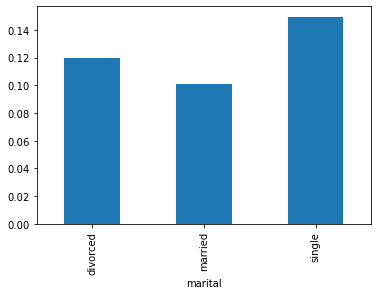

In [121]:
#plot the bar graph of marital status with average value of response_flag
inp1.groupby("marital")["response_flag"].mean().plot.bar()
plt.show()


#### Loans vs response rate 

In [122]:
inp1.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education,response_flag
0,58.0,100000.0,2143.0,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,NaN,0,unknown,no,management,tertiary,0
1,44.0,60000.0,29.0,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,NaN,0,unknown,no,technician,secondary,0
2,33.0,120000.0,2.0,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,NaN,0,unknown,no,entrepreneur,secondary,0
3,47.0,20000.0,1506.0,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,NaN,0,unknown,no,blue-collar,unknown,0
4,33.0,0.0,1.0,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,NaN,0,unknown,no,unknown,unknown,0


In [123]:
inp1.groupby('loan').response_flag.mean()

loan
no     0.126569
yes    0.066953
Name: response_flag, dtype: float64

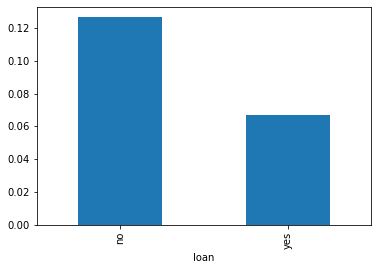

In [124]:
#plot the bar graph of personal loan status with average value of response_flag
inp1.groupby('loan').response_flag.mean().plot.bar()
plt.show()

In [125]:
inp1.loan.value_counts().index

Index(['no', 'yes'], dtype='object')

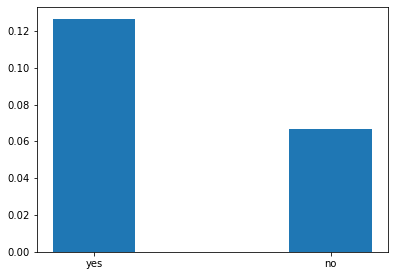

In [126]:
plt.figure(figsize=[6.3,4.5])
plt.bar(x=inp1.housing.value_counts().index,height=inp1.groupby('loan').response_flag.mean(),width=.35)
plt.show()

#### Housing loans vs response rate 

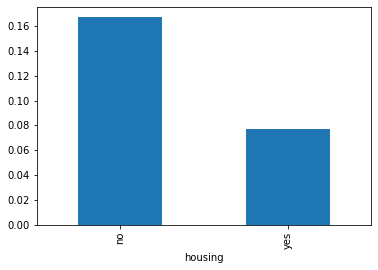

In [127]:
#plot the bar graph of housing loan status with average value of response_flag
inp1.groupby('housing').response_flag.mean().plot.bar()
plt.show()

#### Age vs response 

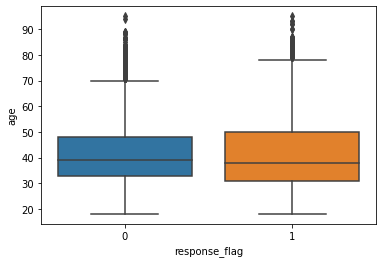

In [128]:
#plot the boxplot of age with response_flag
sns.boxplot(data=inp1,x='response_flag',y='age')
plt.show()
# I have only figured out how to do this in sns. idk how it works in plt

##### making buckets from age columns 

In [141]:
#create the buckets of <30, 30-40, 40-50 50-60 and 60+ from age column.
inp1["age_buckets"]= pd.cut(inp1.age,[0,30,40,50,60,120],labels=["<30", "30-40", "40-50","50-60","60+"])

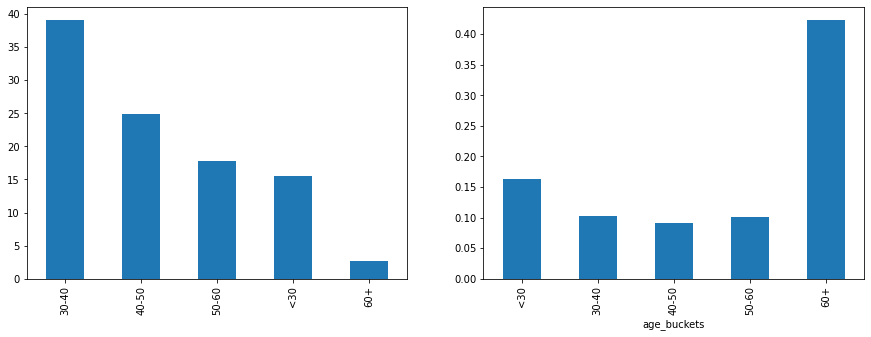

In [209]:
#plot the percentage of each buckets and average values of response_flag in each buckets. plot in subplots.

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
(inp1.age_buckets.value_counts(normalize=True)*100).plot.bar()


plt.subplot(1, 2, 2)
inp1.groupby('age_buckets').response_flag.mean().plot.bar()


plt.show()

<AxesSubplot:xlabel='job'>

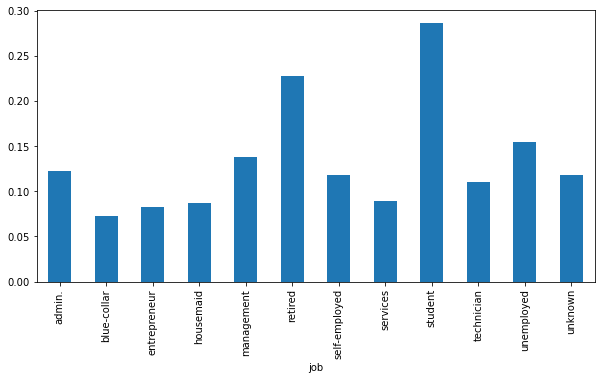

In [173]:
#plot the bar graph of job categories with response_flag mean value.
plt.figure(figsize=(10,5))
inp1.groupby('job').response_flag.mean().plot.bar()

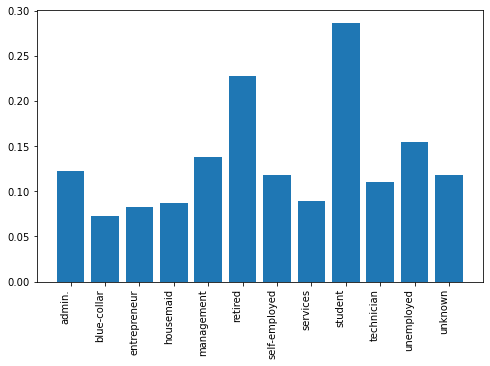

In [181]:
# same thing done using plt
plt.figure(figsize=(8,5))
plt.bar(x=inp1.groupby('job').response_flag.mean().index,height=inp1.groupby('job').response_flag.mean(),)
plt.xticks(rotation=90, ha='right')
plt.show()

### Segment-6, Multivariate analysis 

In [182]:
inp1.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,response,job,education,response_flag,age_group,age_buckets
0,58.0,100000.0,2143.0,married,yes,no,yes,no,unknown,5,...,1,NaN,0,unknown,no,management,tertiary,0,50-60,50-60
1,44.0,60000.0,29.0,single,yes,no,yes,no,unknown,5,...,1,NaN,0,unknown,no,technician,secondary,0,40-50,40-50
2,33.0,120000.0,2.0,married,yes,no,yes,yes,unknown,5,...,1,NaN,0,unknown,no,entrepreneur,secondary,0,30-40,30-40
3,47.0,20000.0,1506.0,married,no,no,yes,no,unknown,5,...,1,NaN,0,unknown,no,blue-collar,unknown,0,40-50,40-50
4,33.0,0.0,1.0,single,no,no,no,no,unknown,5,...,1,NaN,0,unknown,no,unknown,unknown,0,30-40,30-40


In [132]:
inp1.iloc[:,[3,-2,-1]].head()

,marital,response_flag,age_group
0,married,0,50-60
1,single,0,40-50
2,married,0,30-40
3,married,0,40-50
4,single,0,30-40


#### Education vs marital vs response 

In [187]:
inp1.pivot_table(values='response_flag',index='education',columns='marital',aggfunc='mean')

marital,divorced,married,single
education,,,
primary,0.138852,0.075601,0.106808
secondary,0.103559,0.094650,0.129271
tertiary,0.137415,0.129835,0.183737
unknown,0.142012,0.122519,0.162879


In [194]:
pivit_table1 = inp1.pivot_table(values='response_flag',index='education',columns='marital',aggfunc='mean')
pivit_table1

marital,divorced,married,single
education,,,
primary,0.138852,0.075601,0.106808
secondary,0.103559,0.094650,0.129271
tertiary,0.137415,0.129835,0.183737
unknown,0.142012,0.122519,0.162879


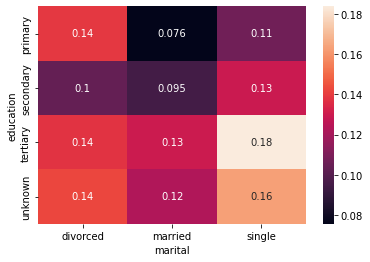

In [197]:
#create heat map of education vs marital vs response_flag
sns.heatmap(data=pivit_table1,annot=True)
plt.show()

#### Job vs marital vs response 

In [ ]:
pivit_table2 = inp1.pivot_table(values='response_flag',index='job',columns='marital',aggfunc='mean')
pivit_table2

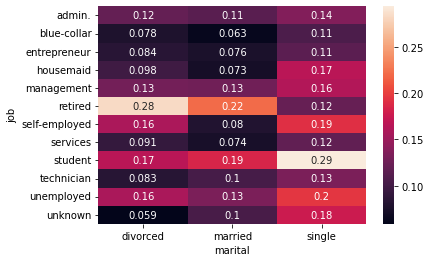

In [199]:
#create the heat map of Job vs marital vs response_flag.
sns.heatmap(data=pivit_table2,annot=True)
plt.show()

#### Education vs poutcome vs response

In [200]:
pivit_table3 = inp1.pivot_table(values='response_flag',index='education',columns='poutcome',aggfunc='mean')
pivit_table3

poutcome,failure,other,success,unknown
education,,,,
primary,0.088785,0.143443,0.609023,0.071821
secondary,0.109007,0.140831,0.641902,0.084244
tertiary,0.168683,0.220994,0.657005,0.114256
unknown,0.158192,0.200000,0.679012,0.101761


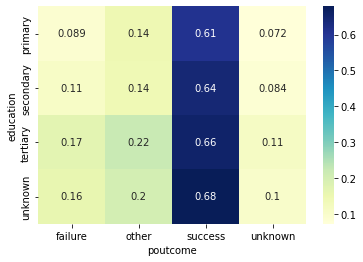

In [214]:
#create the heat map of education vs poutcome vs response_flag.
sns.heatmap(data=pivit_table3,annot=True,cmap='YlGnBu')
plt.show()